<a href="https://colab.research.google.com/github/DavidRandolphjr/Mockdraft-Simulator/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from ipywidgets import VBox, RadioButtons, Label, Image, HTML, Text, Dropdown
from IPython.display import display, clear_output

In [ ]:
import pandas as pd
data = pd.read_csv("/content/fitness_data/ObesityDataSet.csv")
data.dropna(inplace=True)
columns_to_keep = ["Age", "Height", "Weight", "Gender", "FAVC", "FAF", "NObeyesdad"]
data = data[columns_to_keep]
data.to_csv("/content/fitness_data/Cleaned_ObesityDataSet.csv", index=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import joblib
import matplotlib.pyplot as plt

def create_model():
# Read the CSV file into a DataFrame
    data = pd.read_csv("/content/fitness_data/Cleaned_ObesityDataSet.csv")

    # Encode categorical variables
    gender_mapping = {"Male": 0, "Female": 1}
    favc_mapping = {"no": 0, "yes": 1}

    # Map the values to data
    data["Gender"] = data["Gender"].map(gender_mapping)
    data["FAVC"] = data["FAVC"].map(favc_mapping)

    #data.to_csv("Example_ObesityDataSet.csv", index=False)

    # Select features and target variable
    X = data[["Age","Height","Weight", "Gender", "FAVC", "FAF"]]
    y = data["NObeyesdad"]  # Target variable

    # Split data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Machine learning model
    model = RandomForestClassifier(n_estimators=300, random_state=42)

    # Train the model on the training data
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Generate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Save the model
    joblib.dump(model, '/content/fitness_data/ObesityData.joblib')

    conf_matrix = confusion_matrix(y_test, y_pred)

    # Return trained model and accuracy
    return model, accuracy, conf_matrix ,y_test, y_pred











In [ ]:
def model_accuracy():
    return accuracy

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# def create_seq_model():
#     # Step 1: Read the CSV file into a DataFrame
#     data = pd.read_csv("Cleaned_ObesityDataSet.csv")

#     # Step 2: Preprocess the data
#     label_encoder = LabelEncoder()
#     data["Gender"] = label_encoder.fit_transform(data["Gender"])
#     data["FAVC"] = label_encoder.fit_transform(data["FAVC"])
#     data["NObeyesdad"] = label_encoder.fit_transform(data["NObeyesdad"])



#     # Step 3: Select features and target variable
#     X = data[["Age", "Height", "Weight", "Gender", "FAVC", "FAF"]]
#     y = data["NObeyesdad"]  # Target variable

#     # Step 4: Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Step 5: Build the neural network model
#     seq_model = Sequential()
#     seq_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
#     seq_model.add(Dense(32, activation='relu'))
#     seq_model.add(Dense(7, activation='softmax'))  # Output layer with 7 neurons for 7 classes

#     # Compile the model
#     seq_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     seq_model.fit(X_train, y_train, epochs=1000, batch_size=16, verbose=1)

#     joblib.dump(seq_model, 'ObesityDataSeq.joblib')

#     _, accuracy = seq_model.evaluate(X_test, y_test)
#     return seq_model, accuracy, label_encoder






In [ ]:
# def seq_model_accuracy():
#     return accuracy


In [ ]:
# Define the input features

def obese_guess(age, gender, height, weight, favc, faf):
    input_data = pd.DataFrame({
        "Age": [age],
        "Height": [height],
        "Weight": [weight],
        "Gender": [gender],
        "FAVC": [favc],
        "FAF": [faf],
    })
    gender_mapping = {"Male": 0, "Female": 1}
    favc_mapping = {"no": 0, "yes": 1}


    input_data["Gender"] = input_data["Gender"].map(gender_mapping)
    input_data["FAVC"] = input_data["FAVC"].map(favc_mapping)
    # prediction
    prediction = model.predict(input_data)

    return "People who live a similar lifestyle tend to be: %s" % (prediction[0])



In [ ]:

# Let's say you have a new sample with features similar to the training data
def obese_guess_seq(age, gender, height, weight, favc, faf, label_encoder):
    input_data = pd.DataFrame({
        "Age": [age],
        "Height": [height],
        "Weight": [weight],
        "Gender": [gender],
        "FAVC": [favc],
        "FAF": [faf]
    })

    gender_mapping = {"Male": 0, "Female": 1}
    favc_mapping = {"no": 0, "yes": 1}


    # Encode categorical features
    input_data["Gender"] = input_data["Gender"].map(gender_mapping)
    input_data["FAVC"] = input_data["FAVC"].map(favc_mapping)


    # Step 3: Make predictions
    predictions = seq_model.predict(input_data)

    # If you want to get the predicted class labels (e.g., 'Normal Weight', 'Obesity Type I', etc.)
    predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))
    return "According to the sequential model, people who live a similar lifestyle tend to be: %s" % (predicted_labels)


In [ ]:
import numpy as np

# Assuming predictions is the array of probabilities
predictions = np.array([0.40081695, 0.23242158, 0.05647092, 0.00840507, 0.01385038, 0.21131594, 0.07671913])

# Find the index of the maximum value (i.e., the predicted class label)
predicted_class_index = np.argmax(predictions)

# Print the predicted class index
print("Predicted class index:", predicted_class_index)

Predicted class index: 0


In [ ]:
# grandson/granddaughter

gender = widgets.ToggleButtons(
            options=['Male', 'Female']
        )

In [ ]:
# number of faf

age = widgets.IntSlider(
            value=25, # default value
            min=14,
            max=61,
            step=1,
            style={'description_width': 'initial', 'handle_color': '#16a085'}
        )

In [ ]:
# Define the options for the dropdown
height_options = [4, 5, 6,7]

# Create a Dropdown widget
height = Dropdown(
    options=height_options,
    description='Feet:',
    disabled=False
)

In [ ]:
# Define the options for the dropdown
inches_options = [0 ,1 ,2 ,3 , 4, 5, 6, 7, 8, 9, 10, 11]

# Create a Dropdown widget
inches = Dropdown(
    options=inches_options,
    description='Inches:',
    disabled=False
)

In [ ]:
def feet_meters(feet, inches):
    return (feet * .3048) + ((inches/12) * .3048)


In [ ]:
weight = Text(
    placeholder='Enter text here...',
    description='Weight:',
    disabled=False
)

In [ ]:
favc = RadioButtons(options = ['yes', 'no'], description='Choose one:')

In [ ]:
# number of faf

faf = widgets.IntSlider(
            value=0, # default value
            min=0,
            max=3,
            step=1,
            style={'description_width': 'initial', 'handle_color': '#16a085'}
        )

In [ ]:
#calc_options = RadioButtons(options = ['no','Sometimes', 'Frequently'], description='Choose one:')

In [ ]:
# Create Models
model_one, accuracy_one, conf_matrix, y_test, y_pred= create_model()
#model_two, accuracy_two, label_encoder = create_seq_model()


In [ ]:
# Load Models
model = joblib.load('/content/fitness_data/ObesityData.joblib')
#seq_model = joblib.load('ObesityDataSeq.joblib')


In [ ]:
# Accuracy of RandomForestClassifier Model
print("Accuracy:", accuracy_one)

Accuracy: 0.9692671394799054


In [ ]:
#print("Accuracy:", accuracy_two)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion_matrix():
    # Plot confusion matrix as a heatmap
    # Map numerical labels back to their corresponding categories
    obesity_levels = ["Insufficient Weight", "Normal Weight", "Overweight Level I",
                      "Overweight Level II", "Obesity Type I", "Obesity Type II",
                      "Obesity Type III"]

    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=obesity_levels, yticklabels=obesity_levels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

output_confusion = widgets.Output()

# Generate the heatmap and capture the output
with output_confusion:
    confusion_matrix()


In [ ]:
import matplotlib.pyplot as plt

def feature_importance():

    data = pd.read_csv("/content/fitness_data/Cleaned_ObesityDataSet.csv")

    X = data[["Age","Height","Weight", "Gender", "FAVC", "FAF"]]
    # Get feature importances from the trained model
    feature_importances = model.feature_importances_

    # Create a bar plot to visualize feature importances
    plt.figure(figsize=(5, 3))
    plt.barh(X.columns, feature_importances)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance Plot')
    plt.show()

# Create an Output widget to capture the heatmap
output_feature = widgets.Output()

# Generate the heatmap and capture the output
with output_feature:
    feature_importance()

In [ ]:
def data_heatmap():
    data = pd.read_csv("/content/fitness_data/Cleaned_ObesityDataSet.csv")

    label_encoder = LabelEncoder()
    data["Gender"] = label_encoder.fit_transform(data["Gender"])
    data["FAVC"] = label_encoder.fit_transform(data["FAVC"])
    data["NObeyesdad"] = label_encoder.fit_transform(data["NObeyesdad"])
    X = data[["Age","Height","Weight", "Gender", "FAVC", "FAF"]]
    corr_matrix = X.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()


# Create a widget for displaying text
#vbox_text = widgets.VBox([widgets.Label("This is a text widget")])

# Create an Output widget to capture the heatmap
output_heatmap = widgets.Output()

# Generate the heatmap and capture the output
with output_heatmap:
    data_heatmap()

In [ ]:
# button send

button_send = widgets.Button(
                description='Calculate',
                tooltip='Send',
                style={'description_width': 'initial'}
            )

output = widgets.Output()

def on_button_clicked(event):
    with output:
        clear_output()
        float_value = float(weight.value)
        obese_html = f"<h1>{obese_guess(age.value, gender.value, feet_meters(height.value, inches.value), float_value / 2.205, favc.value, faf.value)}"
        #obese_seq_html = f"<h1>{obese_guess_seq(age.value, gender.value, feet_meters(height.value, inches.value), float_value / 2.205, favc.value, faf.value, label_encoder)}"

        html_widget = HTML(value=obese_html)
        #html_widget = HTML(value=obese_html + obese_seq_html)
        #print(obese_guess(age.value, gender.value, favc.value, faf.value, calc_options.value))
        if gender.value == "Male":
            image_path = "/content/fitness_data/All_Might_Rising.png"
            image_widget = Image(value=open(image_path, "rb").read(), format='png')
            image_widget.layout = widgets.Layout(width='400px', height='600px')
        else:
            image_path = "/content/fitness_data/AllMightDeflating.png"
            image_widget = Image(value=open(image_path, "rb").read(), format='png')
        display(html_widget)
        #display(image_widget)
        #confusion_matrix()
        #feature_importance()




button_send.on_click(on_button_clicked)

vbox_result = widgets.VBox([button_send, output])

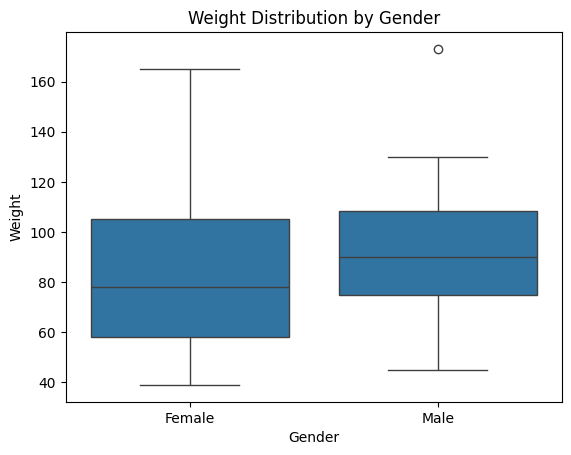

In [ ]:
def box_plot():
    data = pd.read_csv("/content/fitness_data/Cleaned_ObesityDataSet.csv")
    sns.boxplot(x='Gender', y='Weight', data=data)
    plt.title('Weight Distribution by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Weight')
    plt.show()
box_plot()

In [ ]:
import plotly.express as px

def men_levels():
# Drop rows with any missing values
    data = pd.read_csv("/content/fitness_data/Cleaned_ObesityDataSet.csv")

    # Encode categorical variables
    gender_mapping = {"Male": 0, "Female": 1}
    obesity_mapping = {
    "Insufficient_Weight": "Insufficient Weight",
    "Normal_Weight": "Normal Weight",
    "Overweight_Level_I": "Overweight Level I",
    "Overweight_Level_II": "Overweight Level II",
    "Obesity_Type_I": "Obesity Type I",
    "Obesity_Type_II": "Obesity Type II",
    "Obesity_Type_III": "Obesity Type III"
}

    data["Gender"] = data["Gender"].map(gender_mapping)
    data["NObeyesdad"] = data["NObeyesdad"].map(obesity_mapping)

    data["Height"] = data["Height"] * 39.3701
    data["Weight"] = data["Weight"] * 2.20462

    # Filter the dataset to include only men
    men_data = data[data["Gender"] == 0]

    # Create a scatter plot for height vs. weight, colored by obesity levels
    fig = px.scatter(
        men_data,
        x="Height",
        y="Weight",
        color="NObeyesdad",
        labels={
            "Height": "Height (in)",
            "Weight": "Weight (lb)",
            "NObeyesdad": "Obesity Level"
        },
        title="Obesity Levels for Men by Height and Weight",
        category_orders={"NObeyesdad": [
            "Insufficient Weight", "Normal Weight", "Overweight Level I",
            "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"
        ]}
        )

    # Create a Plotly widget
    plot_widget = widgets.Output()
    with plot_widget:
        fig.show()

    return plot_widget


In [ ]:
def women_levels():
# Drop rows with any missing values
    data = pd.read_csv("/content/fitness_data/Cleaned_ObesityDataSet.csv")

    # Encode categorical variables
    gender_mapping = {"Male": 0, "Female": 1}
    obesity_mapping = {
    "Insufficient_Weight": "Insufficient Weight",
    "Normal_Weight": "Normal Weight",
    "Overweight_Level_I": "Overweight Level I",
    "Overweight_Level_II": "Overweight Level II",
    "Obesity_Type_I": "Obesity Type I",
    "Obesity_Type_II": "Obesity Type II",
    "Obesity_Type_III": "Obesity Type III"
}

    data["Gender"] = data["Gender"].map(gender_mapping)
    data["NObeyesdad"] = data["NObeyesdad"].map(obesity_mapping)

    data["Height"] = data["Height"] * 39.3701
    data["Weight"] = data["Weight"] * 2.20462

    # Filter the dataset to include only women
    women_data = data[data["Gender"] == 1]

    # Create a scatter plot for height vs. weight, colored by obesity levels
    fig = px.scatter(
        women_data,
        x="Height",
        y="Weight",
        color="NObeyesdad",
        labels={
            "Height": "Height (in)",
            "Weight": "Weight (lb)",
            "NObeyesdad": "Obesity Level"
        },
        title="Obesity Levels for Women by Height and Weight",
        category_orders={"NObeyesdad": [
            "Insufficient Weight", "Normal Weight", "Overweight Level I",
            "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"
        ]}
        )

    # Show the plot
    fig.show()

women_levels()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_test = precision_score(y_test, y_pred, average='weighted')
print("Precision_score:", precision_test)


Precision_score: 0.9698076723024862


In [ ]:
carousel = widgets.Tab([output_heatmap, output_feature, output_confusion])
carousel.set_title(0, 'Heatmap')
carousel.set_title(1, 'Feature Importance Plot')
carousel.set_title(2, 'Confusion Matrix')
#carousel.layout = widgets.Layout(width='400px', height='600px')

In [ ]:
# stacked right hand side

text_0 = widgets.HTML(value="<h1>Predict obesity levels based on lifestyle!</h1>")
text_1 = widgets.HTML(value="<h2>Enter gender and age.</h2>")
text_2= widgets.HTML(value="<h2>Do you eat high caloric food frequently?</h2>")
text_3= widgets.HTML(value="<h2>On a scale of 0-3, how active are you?</h2>")
text_5= widgets.HTML(value="<h2>Do you drink alchohol?</h2>")

vbox_text = widgets.VBox([text_0, text_1, gender, age, height, inches, weight, text_2, favc, text_3, faf, carousel])

In [ ]:
page = widgets.HBox( [vbox_text, vbox_result])
page.layout = widgets.Layout(margin='10px 50px 15px 50px')
# Display the page
display(page)

# Display the men_levels() plot underneath the page
display(men_levels())

Output()

In [ ]:
#output_confusion

In [ ]:
#output_heatmap

In [ ]:
#output_feature
